# Load Data and perform basic checks for sales details

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
# import matplotlib inline
%matplotlib inline


In [3]:
#import file train.csv into dataframe train convert null values to NaN
train = pd.read_csv('train.csv', na_values="NAN")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#delete records where saleprice is null or zero
train = train[train['SalePrice'].notnull()]
train = train[train['SalePrice'] != 0] 

In [5]:
#info about the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#you can find these features on the description data file provided

non_null_fields = ["Alley","MasVnrType" , "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [7]:
# Replace null with 'None' for these features in train dataset for all the records
for field in non_null_fields:
    train[field] = train[field].fillna('None')

In [8]:
#Check the null values after replacement
train[non_null_fields].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [9]:
#get a count of null values for each column in the train dataset
train.isnull().sum()
#sort the null counts in descending order
null_counts = train.isnull().sum().sort_values(ascending=False)
null_counts.head(10)

LotFrontage     259
GarageYrBlt      81
MasVnrArea        8
Electrical        1
KitchenAbvGr      0
GarageType        0
FireplaceQu       0
Fireplaces        0
Functional        0
TotRmsAbvGrd      0
dtype: int64

In [10]:
# what percentage of data is missing for each of these columns
missing_percentage = (train.isnull().sum() / len(train)) * 100
missing_percentage.sort_values(ascending=False).head(10)

LotFrontage     17.739726
GarageYrBlt      5.547945
MasVnrArea       0.547945
Electrical       0.068493
KitchenAbvGr     0.000000
GarageType       0.000000
FireplaceQu      0.000000
Fireplaces       0.000000
Functional       0.000000
TotRmsAbvGrd     0.000000
dtype: float64

In [11]:
#drop the column lot frontage from the train dataset as it has around 17% missing values
train = train.drop(['LotFrontage'], axis=1)

In [12]:
# for all the numerical columns with null values, replace null with the mean of that column
numerical_fields = train.select_dtypes(include=[np.number]).columns.tolist()
numerical_fields_with_nulls = [field for field in numerical_fields if train[field].isnull().sum() > 0]
for field in numerical_fields_with_nulls:
    train[field] = train[field].fillna(train[field].mean())

In [13]:
# what percentage of data is missing for each of these columns
missing_percentage = (train.isnull().sum() / len(train)) * 100
missing_percentage.sort_values(ascending=False).head(10)

Electrical      0.068493
MSSubClass      0.000000
GarageYrBlt     0.000000
GarageType      0.000000
FireplaceQu     0.000000
Fireplaces      0.000000
Functional      0.000000
TotRmsAbvGrd    0.000000
KitchenQual     0.000000
KitchenAbvGr    0.000000
dtype: float64

# Lets analyse the data for correlation and sales price distribution

<Axes: xlabel='SalePrice', ylabel='Count'>

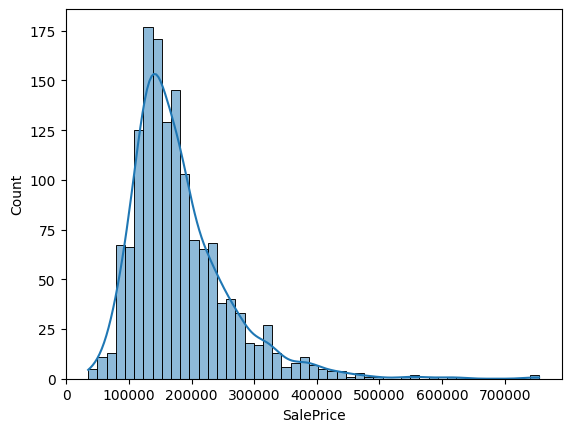

In [14]:
# create a distplot to show the visualization of saleprice
sns.histplot(train['SalePrice'], kde=True)

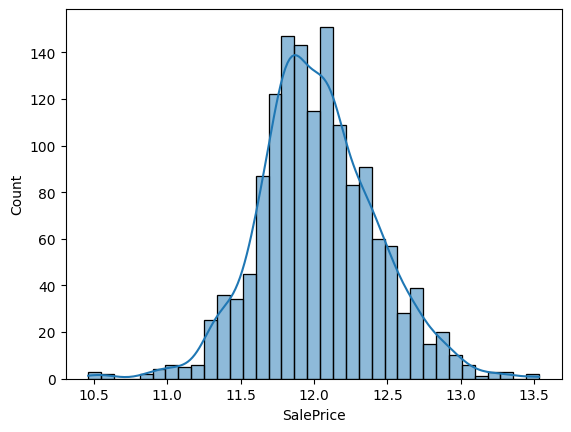

In [15]:
# histplot the log of saleprice
sns.histplot(np.log1p(train['SalePrice']), kde=True)
plt.show()

<Axes: >

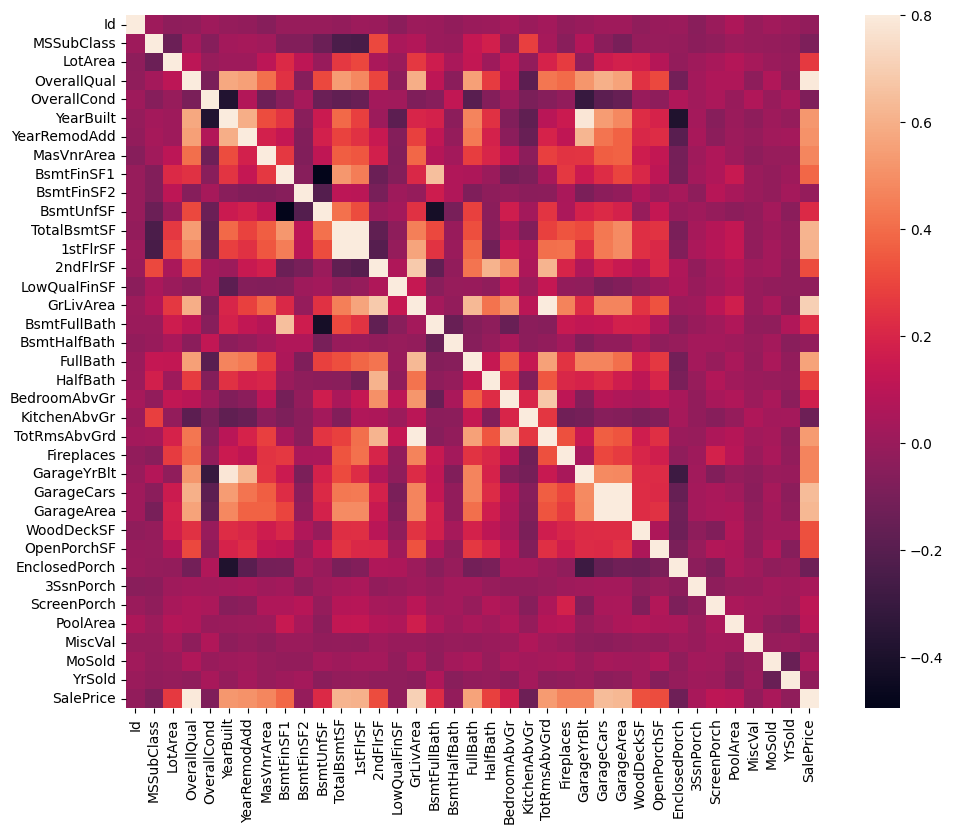

In [16]:
#create a correlation matrix for the train dataset
corrmat = train.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

In [17]:
#Find the top 10 columns which have the highest correlation with SalePrice
correlation_with_saleprice = corrmat['SalePrice'].abs().sort_values(ascending=False)
top_10_correlation = correlation_with_saleprice[1:11]

## Ignoring all other fields so as to keep the model general and robust

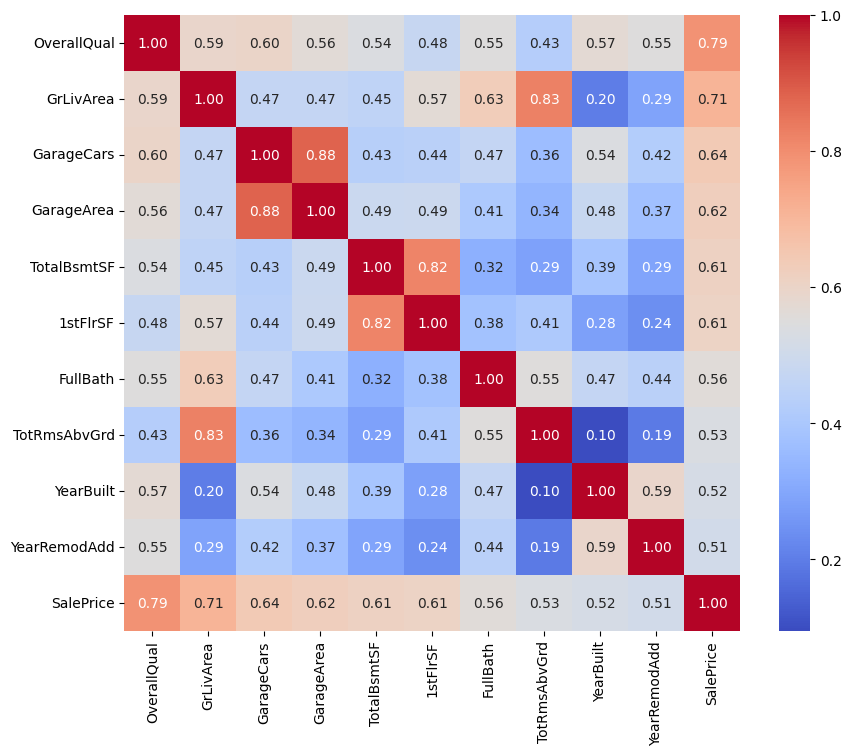

In [18]:
# correlation matrix for top 10 correlated columns with SalePrice
top_10_corrmat = train[top_10_correlation.index.tolist() + ['SalePrice']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(top_10_corrmat, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.show()

In [19]:
# create a new dataframe with only the top 10 correlated columns and SalePrice
top_10_data = train[top_10_correlation.index.tolist() + ['SalePrice']]

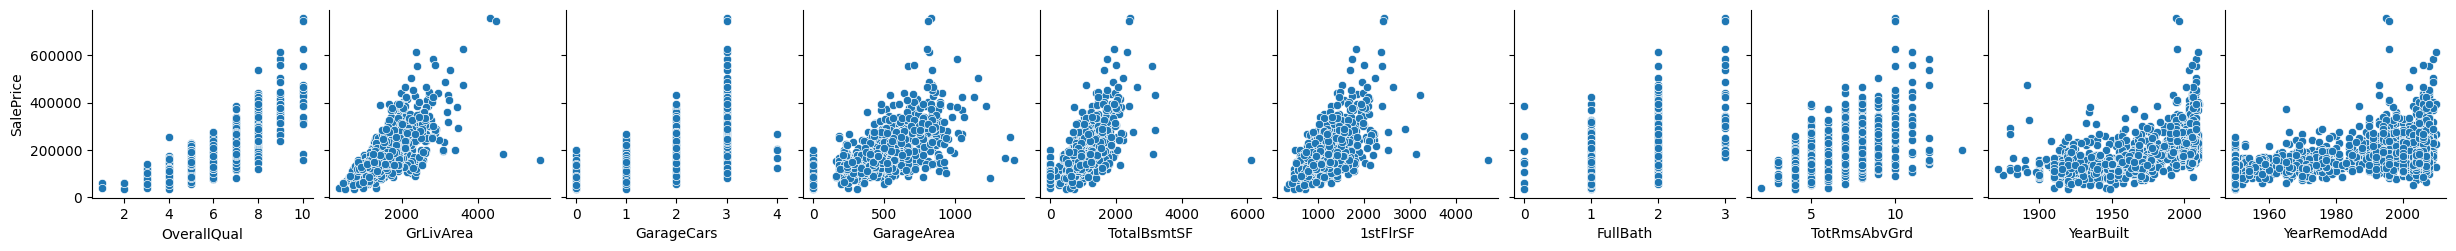

In [20]:
# ignoring the sales price column, create pairplots for the top 10 correlated columns
sns.pairplot(top_10_data, y_vars=['SalePrice'], x_vars=top_10_correlation.index.tolist())
plt.show()

In [21]:
# drop saleprice column and store it new dataframe
top_10_correlation = top_10_data.drop(['SalePrice'], axis=1)
top_10_correlation.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,7,1710,2,548,856,856,2,8,2003,2003
1,6,1262,2,460,1262,1262,2,6,1976,1976
2,7,1786,2,608,920,920,2,6,2001,2002
3,7,1717,3,642,756,961,1,7,1915,1970
4,8,2198,3,836,1145,1145,2,9,2000,2000


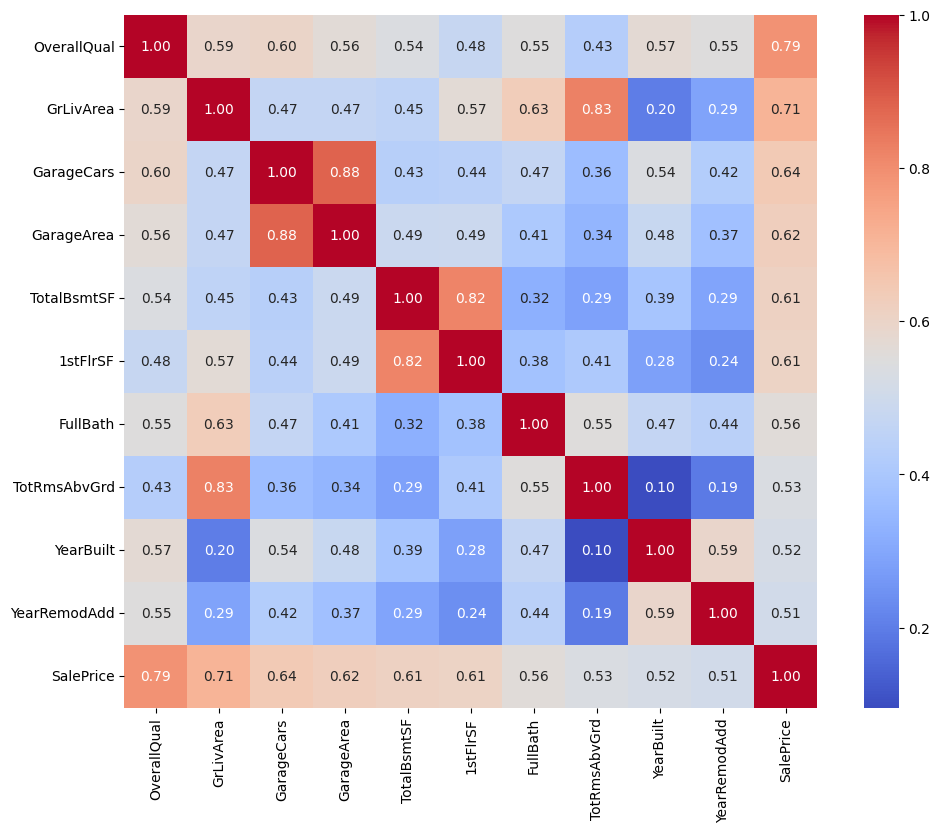

In [22]:
#Correlation matrix for top 10 features
corrmat = top_10_correlation.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12, 9))
sns.heatmap(top_10_corrmat, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.show()

In [23]:
# Drop garagecars and 1stFlrSF from the top 10 correlated features due to high correlation between them and other features
top_10_data = top_10_data.drop(['GarageCars', '1stFlrSF'], axis=1)
top_10_data.head()

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice
0,7,1710,548,856,2,8,2003,2003,208500
1,6,1262,460,1262,2,6,1976,1976,181500
2,7,1786,608,920,2,6,2001,2002,223500
3,7,1717,642,756,1,7,1915,1970,140000
4,8,2198,836,1145,2,9,2000,2000,250000


In [24]:
# generate a new field called SalePrice_Log which is the log of SalePrice
top_10_data['SalePrice_Log'] = np.log1p(top_10_data['SalePrice'])
top_10_data.head()

,OverallQual,GrLivArea,GarageArea,TotalBsmtSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,SalePrice,SalePrice_Log
0,7,1710,548,856,2,8,2003,2003,208500,12.247699
1,6,1262,460,1262,2,6,1976,1976,181500,12.109016
2,7,1786,608,920,2,6,2001,2002,223500,12.317171
3,7,1717,642,756,1,7,1915,1970,140000,11.849405
4,8,2198,836,1145,2,9,2000,2000,250000,12.429220


In [25]:
# drop Id, saleprice and SalePrice_Log columns from the train dataset into X and y
X = top_10_data.drop(['SalePrice', 'SalePrice_Log'], axis=1)
y = top_10_data['SalePrice_Log']

In [26]:
# check the shapes of X and y
print(X.shape)
print(y.shape)

(1460, 8)
(1460,)


In [27]:
#import sklearn packages for model building
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [30]:
# Applying Lasso
lasso = Lasso()

# cross validation
folds = 5
model = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


,estimator,Lasso()
,param_grid,"{'alpha': [0.0001, 0.001, ...]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,alpha,0.01


In [31]:
# get the results from model
results = pd.DataFrame(model.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.002203,0.000400,0.001213,4.132940e-04,0.0001,{'alpha': 0.0001},-0.104321,-0.132779,-0.125632,-0.116810,...,-0.116326,0.011869,3,-0.119491,-0.110728,-0.106774,-0.116841,-0.119417,-0.114650,0.005067
1,0.001999,0.000009,0.001203,4.053126e-04,0.0010,{'alpha': 0.001},-0.104133,-0.132942,-0.125606,-0.116432,...,-0.116250,0.011935,2,-0.119454,-0.110760,-0.106729,-0.116707,-0.119416,-0.114613,0.005057
2,0.001601,0.000491,0.001001,8.341244e-07,0.0100,{'alpha': 0.01},-0.102452,-0.132330,-0.126003,-0.114886,...,-0.115482,0.012276,1,-0.118861,-0.110268,-0.107369,-0.115947,-0.118607,-0.114211,0.004611
3,0.001602,0.000490,0.001000,7.599534e-07,0.0500,{'alpha': 0.05},-0.105387,-0.135751,-0.132665,-0.117575,...,-0.119892,0.012409,4,-0.122446,-0.115700,-0.114445,-0.119336,-0.122101,-0.118806,0.003258
4,0.001400,0.000490,0.001106,2.114536e-04,0.1000,{'alpha': 0.1},-0.112967,-0.141639,-0.137238,-0.124669,...,-0.126808,0.011054,8,-0.130979,-0.122566,-0.119140,-0.127681,-0.129784,-0.126030,0.004490


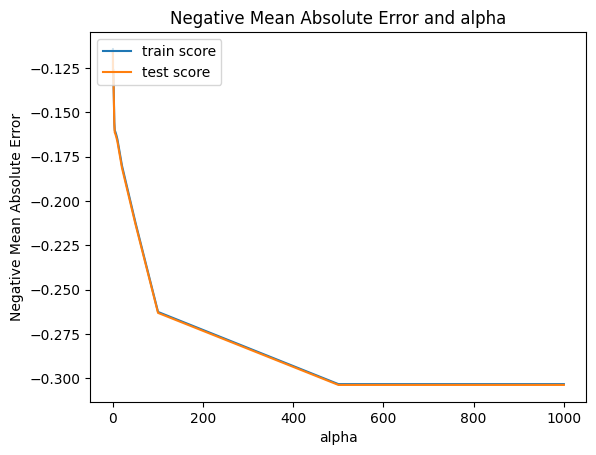

In [32]:
# plotting mean test and train scoes with alpha 
results['param_alpha'] = results['param_alpha'].astype('float32')

# plotting
plt.plot(results['param_alpha'], results['mean_train_score'])
plt.plot(results['param_alpha'], results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [33]:
alpha = 50

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([0.        , 0.00028656, 0.        , 0.00011797, 0.        ,
       0.        , 0.        , 0.        ])

In [34]:
alpha = 100

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([0.        , 0.00014928, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [35]:
# Applying Ridge
ridge = Ridge()

# cross validation
folds = 5
model_ridge = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_ridge.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


,estimator,Ridge()
,param_grid,"{'alpha': [0.0001, 0.001, ...]}"
,scoring,'neg_mean_absolute_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,alpha,100


In [36]:
ridge_results = pd.DataFrame(model_ridge.cv_results_)
ridge_results = ridge_results[ridge_results['param_alpha']<=250]
ridge_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001600,0.000497,0.000904,0.000185,0.0001,{'alpha': 0.0001},-0.104344,-0.132752,-0.125634,-0.116858,...,-0.116335,0.011858,26,-0.119497,-0.110725,-0.106783,-0.116858,-0.119419,-0.114656,0.005068
1,0.001200,0.000399,0.001000,0.000004,0.0010,{'alpha': 0.001},-0.104344,-0.132752,-0.125634,-0.116858,...,-0.116335,0.011858,25,-0.119497,-0.110725,-0.106783,-0.116858,-0.119419,-0.114656,0.005068
2,0.001795,0.000405,0.000203,0.000406,0.0100,{'alpha': 0.01},-0.104344,-0.132752,-0.125634,-0.116858,...,-0.116335,0.011858,24,-0.119497,-0.110725,-0.106783,-0.116858,-0.119419,-0.114656,0.005068
3,0.001209,0.000390,0.001194,0.000338,0.0500,{'alpha': 0.05},-0.104343,-0.132752,-0.125634,-0.116856,...,-0.116335,0.011858,23,-0.119497,-0.110725,-0.106783,-0.116857,-0.119419,-0.114656,0.005068
4,0.001419,0.000520,0.000786,0.000725,0.1000,{'alpha': 0.1},-0.104341,-0.132752,-0.125634,-0.116855,...,-0.116334,0.011858,22,-0.119496,-0.110724,-0.106782,-0.116857,-0.119418,-0.114655,0.005068


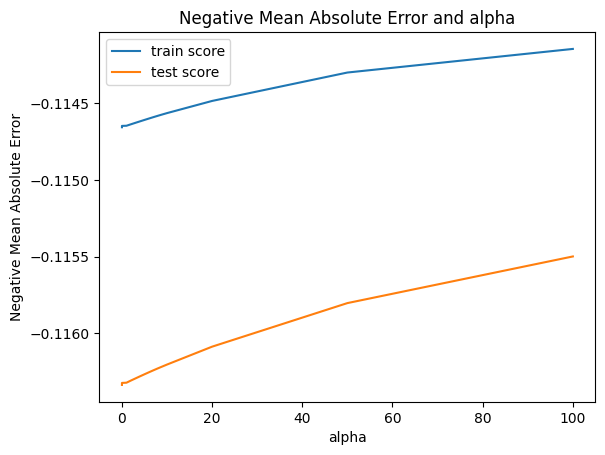

In [37]:
# plotting mean test and train scoes with alpha 
ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')

# plotting
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [38]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 9.54633845e-02,  2.17291328e-04,  2.82674331e-04,  9.95767109e-05,
       -1.76301810e-02,  9.60327273e-03,  2.07941567e-03,  2.25602104e-03])

In [39]:
alpha = 20
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 0.09435953,  0.00021821,  0.00028344,  0.00010017, -0.01653921,
        0.00940435,  0.00208603,  0.00226633])